# Tasmanian.jl 

## Examples

### Preliminaries: Packages

In [210]:
using Tasmanian
using Random
using Plots
using Distributions

### Example 1

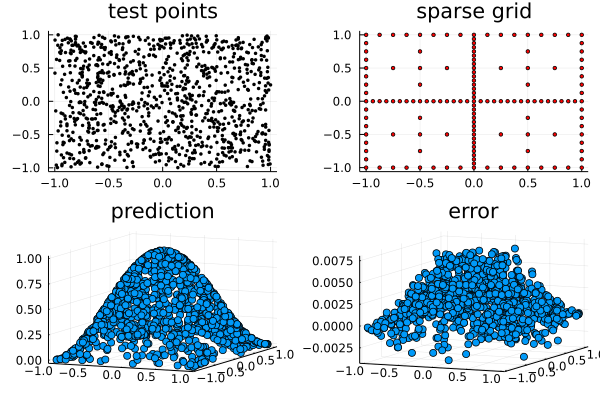

In [4]:
negbox(x) = x*2 - 1
neg2unit(x) = (x+1)/2

iDim = 2
iOut = 1
iDepth = 5
tsg = Tasmanian.TasmanianSG(iDim,iOut,iDepth)
which_basis = 1 #1= linear basis functions -> Check the manual for other options
Tasmanian.makeLocalPolynomialGrid!(tsg,iOrder=which_basis,sRule="localp")

# sparse grid points from that object
spPoints = Tasmanian.getPoints(tsg)

# measure perf at N randomly chosen points
tfun(x,y) = cos(0.5 * pi * x) * cos(0.5 * pi * y)
Random.seed!(1)
N = 1000
randPnts = negbox.(rand(N,2))

# truth
truth = [tfun(randPnts[i,1],randPnts[i,2]) for i in 1:N]

# values on sparse grid
spVals = [tfun(spPoints[i,1],spPoints[i,2]) for i in 1:size(spPoints,1)]

# load points needed for such values
Tasmanian.loadNeededPoints!(tsg,spVals)

# evaluate interpolation
res = Tasmanian.evaluateBatch(tsg,randPnts)

# Plots
p1=scatter(randPnts[:,1],randPnts[:,2],m=(:black,2),title="test points")
p2=scatter(spPoints[:,1],spPoints[:,2],m=(:red,2),title="sparse grid")
pts=plot(p1,p2,legend=false)

#
p4 = plot(randPnts[:,1], randPnts[:,2], truth[:].-res[:], title="error", seriestype=:scatter3d)
p3 = plot(randPnts[:,1],randPnts[:,2],res[:],title="prediction", seriestype=:scatter3d)
p = plot(p1,p2,p3,p4,layout=(2,2),legend=false)


### Example 2

In [5]:
    dim =  2
    outs = 1
    iDepth = 2
    tol = 1e-5
    K = 7  # max refinement steps
    tsg = Tasmanian.TasmanianSG(dim,outs,iDepth)
    which_basis = 1 #1= linear basis functions -> Check the manual for other options
    Tasmanian.makeLocalPolynomialGrid!(tsg,iOrder=which_basis,sRule="localp")

    # sparse grid points from that object
    spPoints = Tasmanian.getPoints(tsg)

    # test fun
    tfun(x,y) = exp(-x^2) * cos(y)

    Random.seed!(2)
    N = 1000
    randPnts = negbox.(rand(N,2))
    # truth
    truth = [tfun(randPnts[i,1],randPnts[i,2]) for i in 1:N]

    # values on sparse grid
    spVals = [tfun(spPoints[i,1],spPoints[i,2]) for i in 1:size(spPoints,1)]
    # load points needed for such values
    Tasmanian.loadNeededPoints!(tsg,spVals)

    # evaluate interpolation
    res = Tasmanian.evaluateBatch(tsg,randPnts)

    numpoints = size(spPoints,1)

    @info("error on initial grid:    $(round(maximum(abs,res .- truth),digits = 5)), with $numpoints points")

    # refinefment loop
    anim = @animate for k in 1:K
        Tasmanian.setSurplusRefinement!(tsg,tol,sCriteria="classic")
        spPoints = Tasmanian.getNeededPoints(tsg)   # additional set of points required after refinement
        spVals = [tfun(spPoints[i,1],spPoints[i,2]) for i in 1:size(spPoints,1)]
        # load points needed for such values
        Tasmanian.loadNeededPoints!(tsg,spVals)
        numpoints =+ size(spPoints,1)

        # evaluate interpolation
        res = Tasmanian.evaluateBatch(tsg,randPnts)
        pred = Tasmanian.evaluateBatch(tsg,Array(spPoints))  # prediction on spGrid
        @info("refinement level $k error: $(round(maximum(abs,res .- truth),digits = 5)), with $numpoints points")

        # plot
        zerone = (-1.1,1.1)
        plot(scatter(spPoints[:,1],spPoints[:,2],title="level $k grid:\n $numpoints points",m=(:black,1,:+),aspect_ratio=:equal,xlims=zerone,ylims=zerone),
             scatter3d(randPnts[:,1],randPnts[:,2],res[:],title="max error: $(round(maximum(abs,res .- truth),digits = 5))",m=(:red,1),xlims=zerone,ylims=zerone,zlims=(0,1)),
             scatter3d(spPoints[:,1],spPoints[:,2],pred[:],title="grid prediction",m=(:red,1,0.2),zlims=(0,1),xlims=zerone,ylims=zerone,zgrid=:black),
             layout=(1,3),leg=false
             )
    end


┌ Info: error on initial grid:    0.06747, with 13 points
└ @ Main In[5]:32
┌ Info: refinement level 1 error: 0.02151, with 16 points
└ @ Main In[5]:46
┌ Info: refinement level 2 error: 0.00873, with 36 points
└ @ Main In[5]:46
┌ Info: refinement level 3 error: 0.00313, with 80 points
└ @ Main In[5]:46
┌ Info: refinement level 4 error: 0.00096, with 176 points
└ @ Main In[5]:46
┌ Info: refinement level 5 error: 0.00031, with 384 points
└ @ Main In[5]:46
┌ Info: refinement level 6 error: 9.0e-5, with 824 points
└ @ Main In[5]:46
┌ Info: refinement level 7 error: 3.0e-5, with 1688 points
└ @ Main In[5]:46


Animation("/tmp/jl_fB4Ym3", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png"])

┌ Info: Saved animation to 
│   fn = /home/julien/Documents/REPOSITORIES/Tasmanian.jl/examples/tmp.gif
└ @ Plots /home/julien/.julia/packages/Plots/FI0vT/src/animation.jl:114


Plots.AnimatedGif("/home/julien/Documents/REPOSITORIES/Tasmanian.jl/examples/tmp.gif")
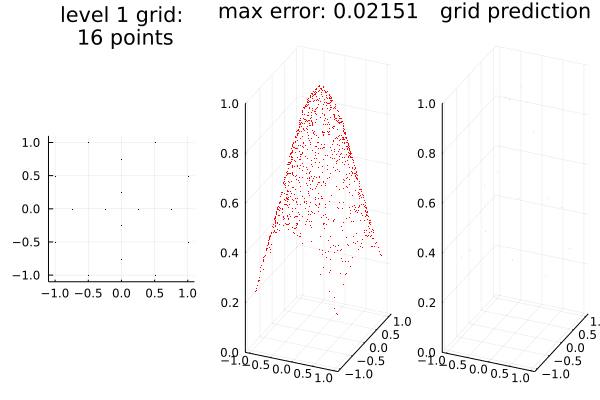

In [6]:
 gif(anim,fps = 1)

### Example 3

┌ Info: error on initial grid:    6.53561, with 13 points
└ @ Main In[7]:34
┌ Info: refinement level 1 error: 6.24284, with 16 points
└ @ Main In[7]:50
┌ Info: refinement level 2 error: 10.24053, with 36 points
└ @ Main In[7]:50
┌ Info: refinement level 3 error: 4.72196, with 80 points
└ @ Main In[7]:50
┌ Info: refinement level 4 error: 3.45147, with 170 points
└ @ Main In[7]:50
┌ Info: refinement level 5 error: 4.4628, with 350 points
└ @ Main In[7]:50
┌ Info: refinement level 6 error: 3.38125, with 680 points
└ @ Main In[7]:50
┌ Info: refinement level 7 error: 2.66335, with 1222 points
└ @ Main In[7]:50
┌ Info: refinement level 8 error: 1.2531, with 2121 points
└ @ Main In[7]:50
┌ Info: refinement level 9 error: 1.18816, with 3550 points
└ @ Main In[7]:50
┌ Info: Saved animation to 
│   fn = /home/julien/Documents/REPOSITORIES/Tasmanian.jl/examples/tmp.gif
└ @ Plots /home/julien/.julia/packages/Plots/FI0vT/src/animation.jl:114


Plots.AnimatedGif("/home/julien/Documents/REPOSITORIES/Tasmanian.jl/examples/tmp.gif")
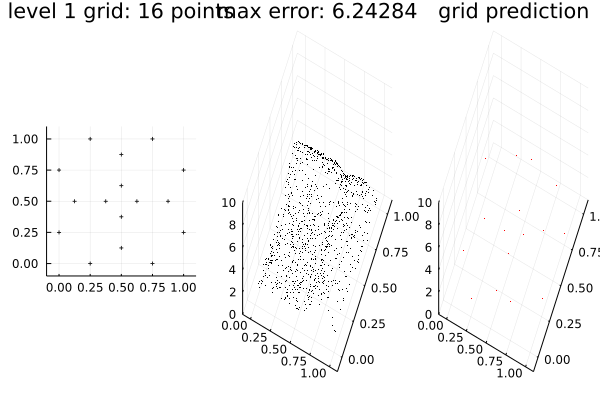

In [7]:
tfun(x,y) = 1.0 / (abs(0.5 - x^4 - y^4) + 0.1)
dim =  2
outs = 1
iDepth = 2
tol = 1e-5
K = 9  # max refinement steps
tsg = Tasmanian.TasmanianSG(dim,outs,iDepth)

which_basis = 1 #1= linear basis functions -> Check the manual for other options
Tasmanian.makeLocalPolynomialGrid!(tsg,iOrder=which_basis,sRule="localp")

# domain is [0,1] here
Tasmanian.setDomainTransform!(tsg,[0 1.0;0 1])

# sparse grid points from that object
spPoints = Tasmanian.getPoints(tsg)
Random.seed!(2)
N = 1000
randPnts = rand(N,2)
# truth
truth = [tfun(randPnts[i,1],randPnts[i,2]) for i in 1:N]

# values on sparse grid
spVals = [tfun(spPoints[i,1],spPoints[i,2]) for i in 1:size(spPoints,1)]
# load points needed for such values
Tasmanian.loadNeededPoints!(tsg,spVals)

# evaluate interpolation
res = Tasmanian.evaluateBatch(tsg,randPnts)
# res = evaluateBatch(tsg,randPnts)

numpoints = size(spPoints,1)

@info("error on initial grid:    $(round(maximum(abs,res .- truth),digits = 5)), with $numpoints points")

# refinefment loop
anim = @animate for k in 1:K
    Tasmanian.setSurplusRefinement!(tsg,tol,sCriteria="classic")
    spPoints = Tasmanian.getNeededPoints(tsg)
    spVals = [tfun(spPoints[i,1],spPoints[i,2]) for i in 1:size(spPoints,1)]
    # load points needed for such values
    Tasmanian.loadNeededPoints!(tsg,spVals)
    numpoints =+ size(spPoints,1)

    # evaluate interpolation
    res = Tasmanian.evaluateBatch(tsg,randPnts)
    pred = Tasmanian.evaluateBatch(tsg,Array(spPoints))  # prediction on spGrid
    # res = evaluateBatch(tsg,randPnts)
    zerone = (-0.1,1.1)
    @info("refinement level $k error: $(round(maximum(abs,res .- truth),digits = 5)), with $numpoints points")
    plot(scatter(spPoints[:,1],spPoints[:,2],title="level $k grid: $numpoints points",m=(:black,2,:+),aspect_ratio=:equal,xlims=zerone,ylims=zerone),
         scatter3d(randPnts[:,1],randPnts[:,2],res[:],title="max error: $(round(maximum(abs,res .- truth),digits = 5))",m=(:black,1),zlims=(0,10),camera=(30,70),xlims=zerone,ylims=zerone),
         scatter3d(spPoints[:,1],spPoints[:,2],pred[:],title="grid prediction",m=(:red,1),zlims=(0,10),camera=(30,70),xlims=zerone,ylims=zerone,zforeground_color_grid=:black),
         layout=(1,3),leg=false
         )
end

return gif(anim,fps = 1)

### Example 4

In [75]:
tfun(x,y) = 1.0 / (abs(0.5 - x^4 - y^4) + 0.1)

dim =  2
outs = 1
iDepth = 2
tol = 1e-5
K = 9  # max refinement steps
tsg = Tasmanian.TasmanianSG(dim,outs,iDepth)

which_basis = 1 #1= linear basis functions -> Check the manual for other options
Tasmanian.makeLocalPolynomialGrid!(tsg,iOrder=which_basis,sRule="localp")

# domain is [0,1] here
Tasmanian.setDomainTransform!(tsg,[0 1.0;0 1])

# sparse grid points from that object
spPoints = Tasmanian.getPoints(tsg)
Random.seed!(2)
N = 1000
randPnts = rand(N,2)
# truth
truth = [tfun(randPnts[i,1],randPnts[i,2]) for i in 1:N]

# values on sparse grid
spVals = [tfun(spPoints[i,1],spPoints[i,2]) for i in 1:size(spPoints,1)]
# load points needed for such values
Tasmanian.loadNeededPoints!(tsg,spVals)
# evaluate interpolation
res = Tasmanian.evaluateBatch(tsg,randPnts)
# res = evaluateBatch(tsg,randPnts)

numpoints = size(spPoints,1)

13

In [76]:
tsg


          Grid Type:  Local Polynomial
         Dimensions:   2
            Outputs:   1
       Loaded nodes:   13
       Needed nodes:   0
               Rule:  Local polynomials
             Domain:  Custom
              Order:   1
       Acceleration:  none



In [77]:
max_nb_points = 1000
nb_refinements = 0
while size(spPoints,1) < max_nb_points
    nb_refinements+=1
    Tasmanian.setSurplusRefinement!(tsg,tol, sCriteria="classic")
    spPoints = Tasmanian.getNeededPoints(tsg)
    spVals = [tfun(spPoints[i,1],spPoints[i,2]) for i in 1:size(spPoints,1)]
    # load points needed for such values
    Tasmanian.loadNeededPoints!(tsg,spVals)
end

In [78]:
tsg


          Grid Type:  Local Polynomial
         Dimensions:   2
            Outputs:   1
       Loaded nodes:   2567
       Needed nodes:   0
               Rule:  Local polynomials
             Domain:  Custom
              Order:   1
       Acceleration:  none



In [79]:
nb_refinements

7

┌ Info: refinement level 1 error: 2.66335, with 13 points
└ @ Main In[80]:7


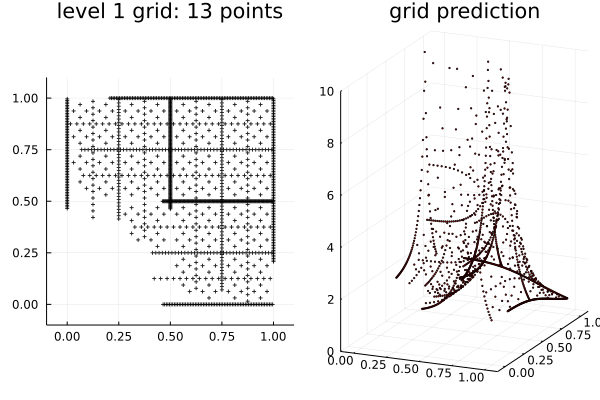

In [80]:
k=1
# evaluate interpolation
res = Tasmanian.evaluateBatch(tsg,randPnts)
pred = Tasmanian.evaluateBatch(tsg,Array(spPoints))  # prediction on spGrid
# res = evaluateBatch(tsg,randPnts)
zerone = (-0.1,1.1)
@info("refinement level $k error: $(round(maximum(abs,res .- truth),digits = 5)), with $numpoints points")
plot(scatter(spPoints[:,1],spPoints[:,2],title="level $k grid: $numpoints points",m=(:black,2,:+),aspect_ratio=:equal,xlims=zerone,ylims=zerone),
    scatter3d(spPoints[:,1],spPoints[:,2],pred[:],title="grid prediction",m=(:red,1),zlims=(0,10),xlims=zerone,ylims=zerone,zforeground_color_grid=:black),
     leg=false
     )

### Example 5

In [199]:
function rosenbrock(x)
    return( sum( 100.0 .*( x[2:end] .- x[1:end-1].^2 ).^2 + ( x[1:end-1] .- 1 ).^2 ) )
end

rosenbrock (generic function with 1 method)

In [221]:
dim =  3
outs = 1
iDepth = 2
tol = 1e-5
tsg = Tasmanian.TasmanianSG(dim,outs,iDepth)

which_basis = 1 #1= linear basis functions -> Check the manual for other options
Tasmanian.makeLocalPolynomialGrid!(tsg,iOrder=which_basis,sRule="localp")

# domain is [0,1] here
Tasmanian.setDomainTransform!(tsg,[-5.0 5.0; -5.0 5.0; -5.0 5.0])

# sparse grid points from that object
spPoints = Tasmanian.getPoints(tsg)
Random.seed!(2)
N = 1000
d_Uniform = Product(Uniform.(-5.0 .*ones(dim), 5.0 .*ones(dim)))
randPnts = Matrix(transpose(rand(d_Uniform, N)))
# truth
truth = [rosenbrock([randPnts[i,1]; randPnts[i,2]; randPnts[i,3]]) for i in 1:N];

In [222]:
# values on sparse grid
spVals = [rosenbrock([spPoints[i,1]; spPoints[i,2]; spPoints[i,3]]) for i in 1:size(spPoints,1)]
# load points needed for such values
Tasmanian.loadNeededPoints!(tsg,spVals)
# evaluate interpolation
res = Tasmanian.evaluateBatch(tsg,randPnts)
numpoints = size(spPoints,1)

25

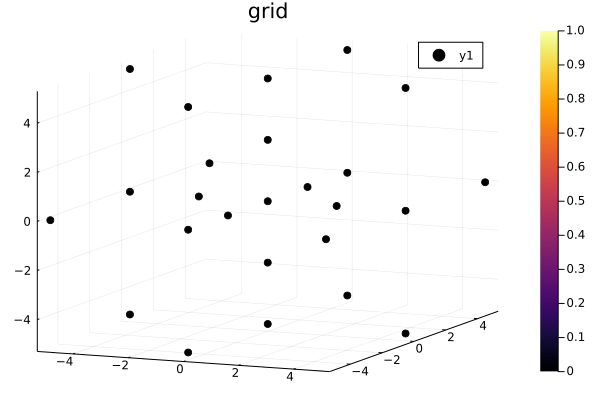

In [223]:
# evaluate interpolation
res = Tasmanian.evaluateBatch(tsg, randPnts)
pred = Tasmanian.evaluateBatch(tsg, Array(spPoints))  # prediction on spGrid
true_vals = [rosenbrock(spPoints[k,:]) for k in 1:size(spPoints,1)]
plot(spPoints[:,1],spPoints[:,2],spPoints[:,3],title="grid", zcolor=pred[:] .- true_vals, st=:scatter3d)

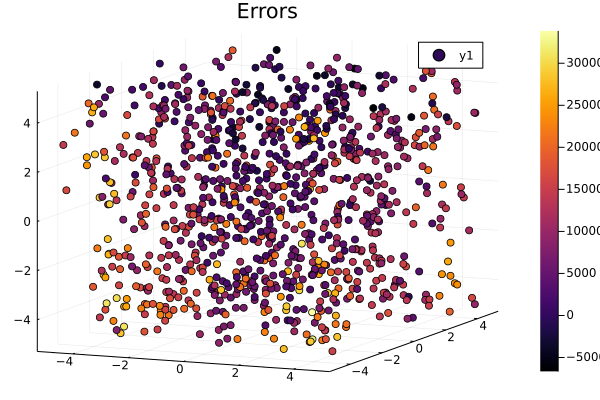

In [224]:
res = Tasmanian.evaluateBatch(tsg,randPnts)
err = res .- truth
plot(randPnts[:,1],randPnts[:,2],randPnts[:,3],title="Errors", zcolor=err, st=:scatter3d)

In [225]:
max_nb_points = 1000
nb_refinements = 0
while size(spPoints,1) < max_nb_points
    nb_refinements+=1
    Tasmanian.setSurplusRefinement!(tsg, tol, sCriteria="classic")
    spPoints = Tasmanian.getNeededPoints(tsg)
    spVals = [rosenbrock([spPoints[i,1]; spPoints[i,2]; spPoints[i,3]]) for i in 1:size(spPoints,1)]
    # load points needed for such values
    Tasmanian.loadNeededPoints!(tsg,spVals)
end
println(size(spPoints,1))

1088


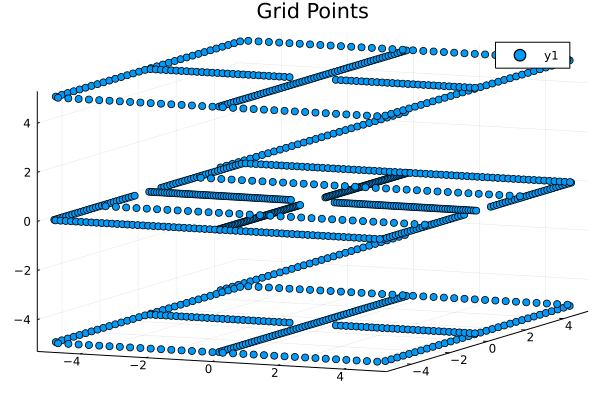

In [226]:
# evaluate interpolation
res = Tasmanian.evaluateBatch(tsg,randPnts)
pred = Tasmanian.evaluateBatch(tsg,Array(spPoints))  # prediction on spGrid
plot(spPoints[:,1],spPoints[:,2],spPoints[:,3],title="Grid Points", st=:scatter3d)

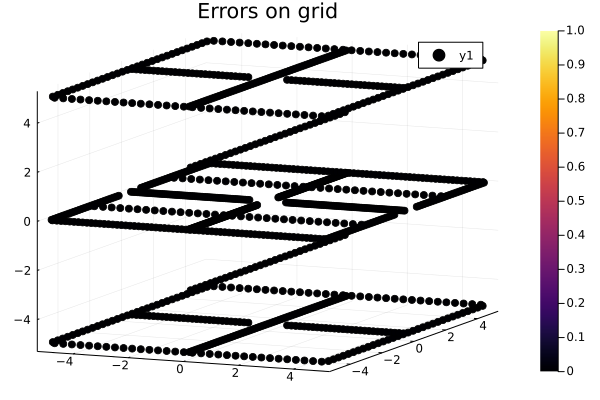

In [227]:
# evaluate interpolation
res = Tasmanian.evaluateBatch(tsg,randPnts)
pred = Tasmanian.evaluateBatch(tsg, Array(spPoints))  # prediction on spGrid
true_vals = [rosenbrock(spPoints[k,:]) for k in 1:size(spPoints,1)]
plot(spPoints[:,1],spPoints[:,2],spPoints[:,3],title="Errors on grid", zcolor=pred[:] .- true_vals, st=:scatter3d)

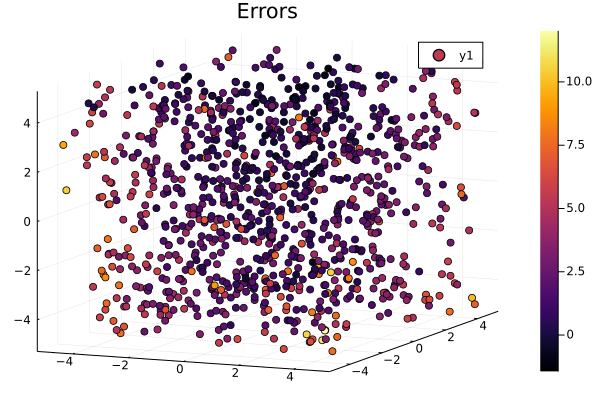

In [228]:
res = Tasmanian.evaluateBatch(tsg,randPnts)
err = res .- truth
plot(randPnts[:,1],randPnts[:,2],randPnts[:,3],title="Errors", zcolor=err, st=:scatter3d)